# Phase 2: Baseline Data Collection & Analysis

This notebook analyzes the comprehensive baseline data collected from 100 episodes of random agent gameplay.

## Objectives
1. Load and explore 100-episode baseline dataset
2. Perform statistical analysis
3. Visualize performance distributions
4. Identify patterns and insights
5. Establish metrics for future comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import scipy.stats as stats

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Imports successful")

✓ Imports successful


## 1. Load Baseline Data

In [2]:
# Load statistics
with open('../data/phase2/baseline_statistics.json', 'r') as f:
    baseline_stats = json.load(f)

# Load episode data
df = pd.read_csv('../data/phase2/baseline_episodes.csv')

print(f"Loaded data from {baseline_stats['num_episodes']} episodes")
print(f"\nDataset shape: {df.shape}")
print("\nFirst few episodes:")
df.head(10)

Loaded data from 100 episodes

Dataset shape: (100, 6)

First few episodes:


,episode,total_reward,episode_length,avg_reward_per_step,max_single_reward,non_zero_rewards
0,1,135.0,598,0.225753,25.0,11
1,2,135.0,500,0.270000,30.0,9
2,3,490.0,832,0.588942,200.0,19
3,4,150.0,513,0.292398,30.0,11
4,5,210.0,590,0.355932,30.0,12
5,6,80.0,296,0.270270,20.0,7
6,7,100.0,471,0.212314,25.0,6
7,8,210.0,576,0.364583,30.0,12
8,9,335.0,511,0.655577,200.0,10
9,10,285.0,751,0.379494,30.0,17


## 2. Basic Statistics

In [3]:
print("BASELINE PERFORMANCE SUMMARY")
print("=" * 60)
print("\n📊 Reward Statistics:")
print(f"  Mean: {baseline_stats['reward_stats']['mean']:.2f} ± {baseline_stats['reward_stats']['std']:.2f}")
print(f"  Median: {baseline_stats['reward_stats']['median']:.2f}")
print(f"  Range: [{baseline_stats['reward_stats']['min']:.0f}, {baseline_stats['reward_stats']['max']:.0f}]")
print(f"  25th Percentile: {baseline_stats['reward_stats']['q25']:.2f}")
print(f"  75th Percentile: {baseline_stats['reward_stats']['q75']:.2f}")
print(f"  IQR: {baseline_stats['reward_stats']['iqr']:.2f}")
print(f"  Coefficient of Variation: {baseline_stats['reward_stats']['cv']:.2f}")

print("\n📏 Episode Length Statistics:")
print(f"  Mean: {baseline_stats['length_stats']['mean']:.1f} ± {baseline_stats['length_stats']['std']:.1f}")
print(f"  Median: {baseline_stats['length_stats']['median']:.1f}")
print(f"  Range: [{baseline_stats['length_stats']['min']}, {baseline_stats['length_stats']['max']}]")

print("\n🎯 Performance Metrics:")
print(f"  Avg Reward/Step: {baseline_stats['performance_stats']['avg_reward_per_step_mean']:.4f}")
print(f"  Avg Max Single Reward: {baseline_stats['performance_stats']['max_single_reward_mean']:.2f}")
print(f"  Zero Reward Episodes: {baseline_stats['performance_stats']['zero_reward_episodes']}")
print(f"  High Performing Episodes (>μ+σ): {baseline_stats['performance_stats']['high_performing_episodes']}")

BASELINE PERFORMANCE SUMMARY

📊 Reward Statistics:
  Mean: 146.95 ± 93.14
  Median: 125.00
  Range: [10, 490]
  25th Percentile: 83.75
  75th Percentile: 181.25
  IQR: 97.50
  Coefficient of Variation: 0.63

📏 Episode Length Statistics:
  Mean: 504.4 ± 155.9
  Median: 473.0
  Range: [268, 960]

🎯 Performance Metrics:
  Avg Reward/Step: 0.2746
  Avg Max Single Reward: 36.55
  Zero Reward Episodes: 0
  High Performing Episodes (>μ+σ): 13


## 3. DataFrame Summary Statistics

In [4]:
print("\nDataFrame Summary Statistics:")
df.describe()


DataFrame Summary Statistics:


,episode,total_reward,episode_length,avg_reward_per_step,max_single_reward,non_zero_rewards
count,100.000000,100.00000,100.0000,100.000000,100.000000,100.000000
mean,50.500000,146.95000,504.4100,0.274557,36.550000,9.320000
std,29.011492,93.60592,156.6423,0.115811,41.873396,4.141146
min,1.000000,10.00000,268.0000,0.026954,5.000000,2.000000
25%,25.750000,83.75000,389.0000,0.214345,25.000000,6.000000
50%,50.500000,125.00000,473.0000,0.266250,30.000000,9.000000
75%,75.250000,181.25000,598.7500,0.318261,30.000000,12.000000
max,100.000000,490.00000,960.0000,0.671031,200.000000,20.000000


## 4. Visualizations

/var/folders/1b/qt3mr0d51kx01__c48xxtw9w0000gn/T/ipykernel_22541/415271298.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot([df['total_reward']], labels=['Total Reward'], patch_artist=True,


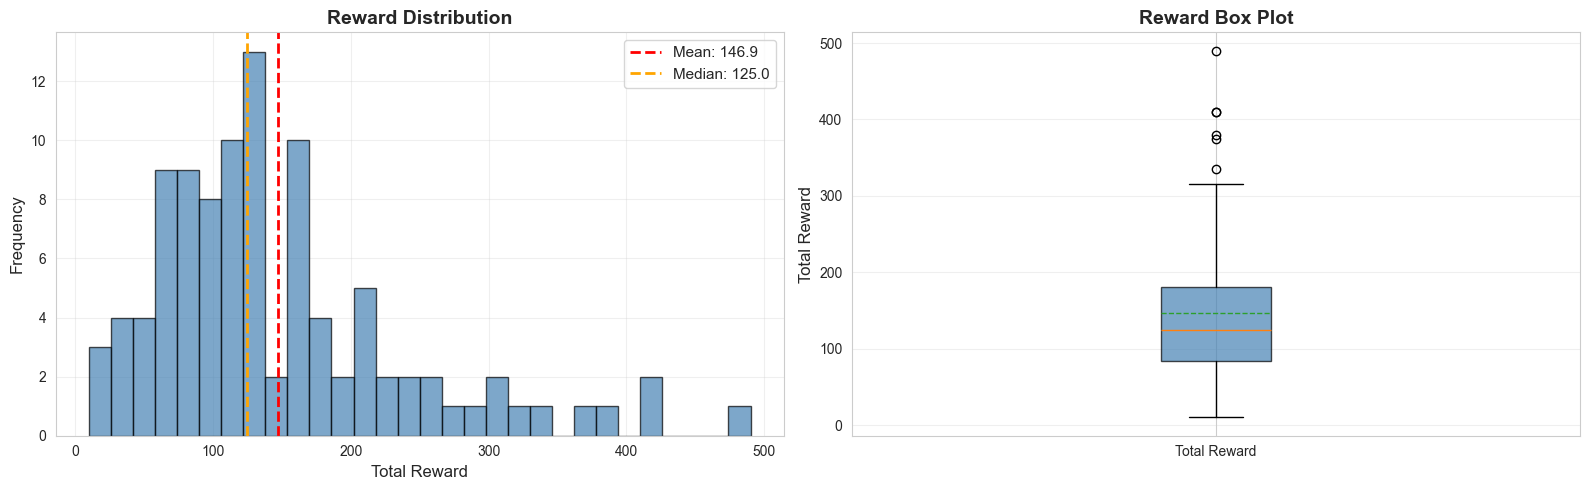

In [5]:
# Reward distribution with statistics
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(df['total_reward'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=baseline_stats['reward_stats']['mean'], color='red', linestyle='--', 
                linewidth=2, label=f"Mean: {baseline_stats['reward_stats']['mean']:.1f}")
axes[0].axvline(x=baseline_stats['reward_stats']['median'], color='orange', linestyle='--', 
                linewidth=2, label=f"Median: {baseline_stats['reward_stats']['median']:.1f}")
axes[0].set_xlabel('Total Reward', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Reward Distribution', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Box plot
bp = axes[1].boxplot([df['total_reward']], labels=['Total Reward'], patch_artist=True, 
                      showmeans=True, meanline=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][0].set_alpha(0.7)
axes[1].set_ylabel('Total Reward', fontsize=12)
axes[1].set_title('Reward Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

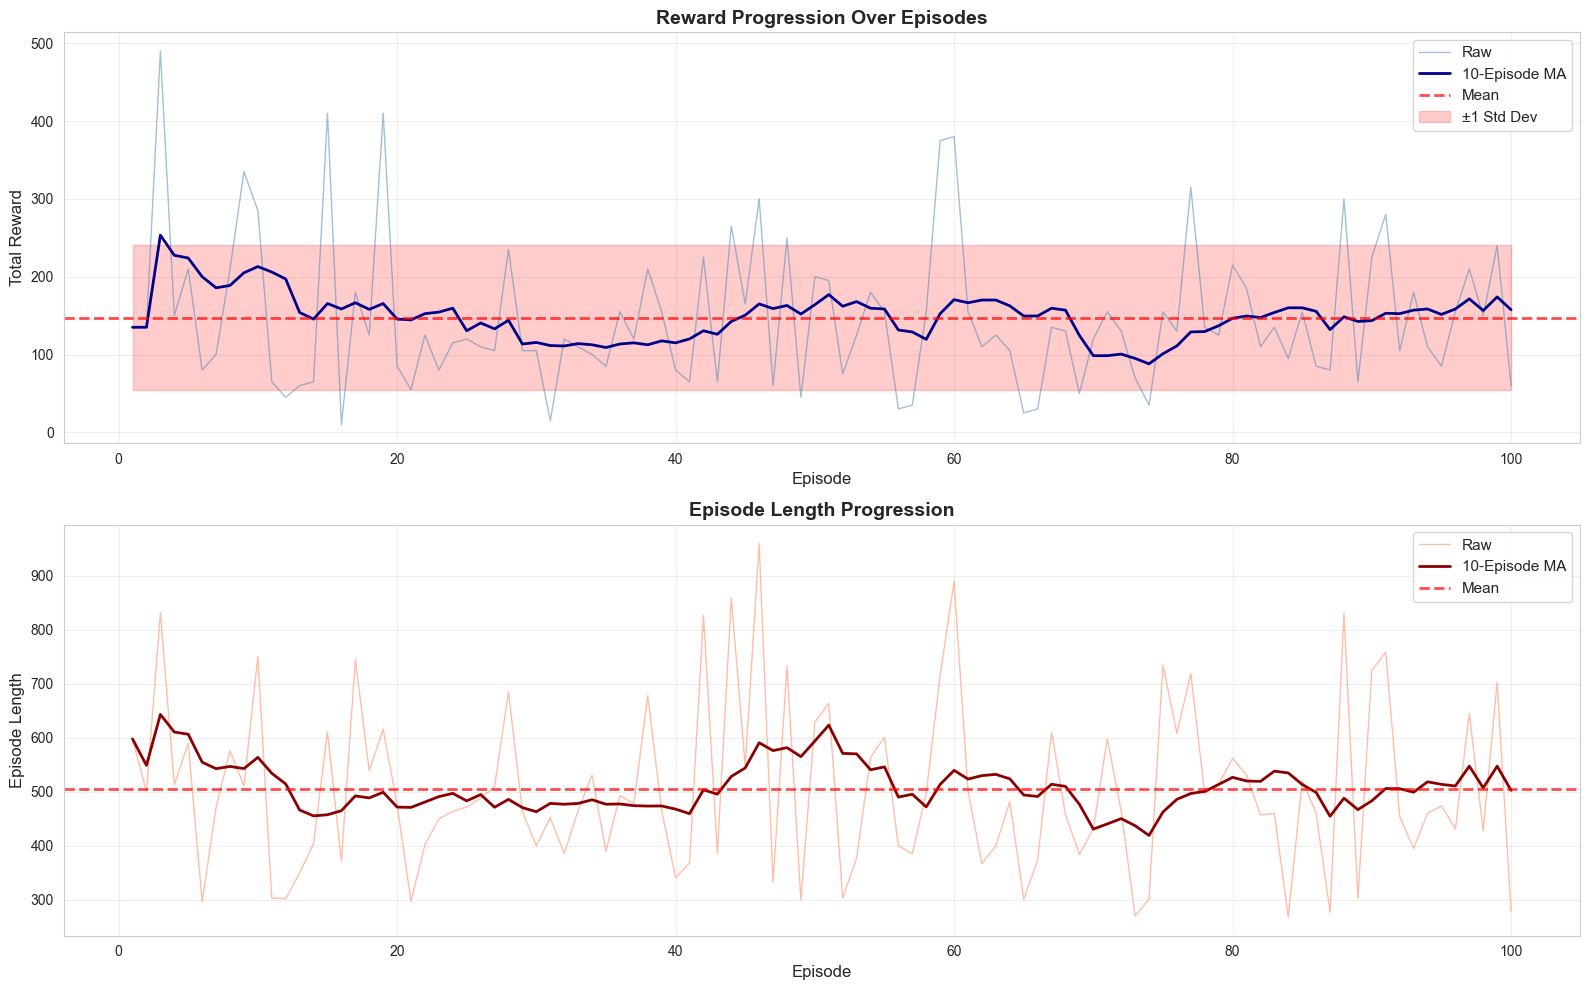

In [6]:
# Episode progression
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Rewards over time
axes[0].plot(df['episode'], df['total_reward'], alpha=0.5, linewidth=1, color='steelblue', label='Raw')
moving_avg = df['total_reward'].rolling(window=10, min_periods=1).mean()
axes[0].plot(df['episode'], moving_avg, linewidth=2, color='darkblue', label='10-Episode MA')
axes[0].axhline(y=baseline_stats['reward_stats']['mean'], color='red', linestyle='--', 
                linewidth=2, alpha=0.7, label='Mean')
axes[0].fill_between(df['episode'], 
                      baseline_stats['reward_stats']['mean'] - baseline_stats['reward_stats']['std'],
                      baseline_stats['reward_stats']['mean'] + baseline_stats['reward_stats']['std'],
                      alpha=0.2, color='red', label='±1 Std Dev')
axes[0].set_xlabel('Episode', fontsize=12)
axes[0].set_ylabel('Total Reward', fontsize=12)
axes[0].set_title('Reward Progression Over Episodes', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Episode lengths over time
axes[1].plot(df['episode'], df['episode_length'], alpha=0.5, linewidth=1, color='coral', label='Raw')
moving_avg_length = df['episode_length'].rolling(window=10, min_periods=1).mean()
axes[1].plot(df['episode'], moving_avg_length, linewidth=2, color='darkred', label='10-Episode MA')
axes[1].axhline(y=baseline_stats['length_stats']['mean'], color='red', linestyle='--', 
                linewidth=2, alpha=0.7, label='Mean')
axes[1].set_xlabel('Episode', fontsize=12)
axes[1].set_ylabel('Episode Length', fontsize=12)
axes[1].set_title('Episode Length Progression', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Correlation Analysis

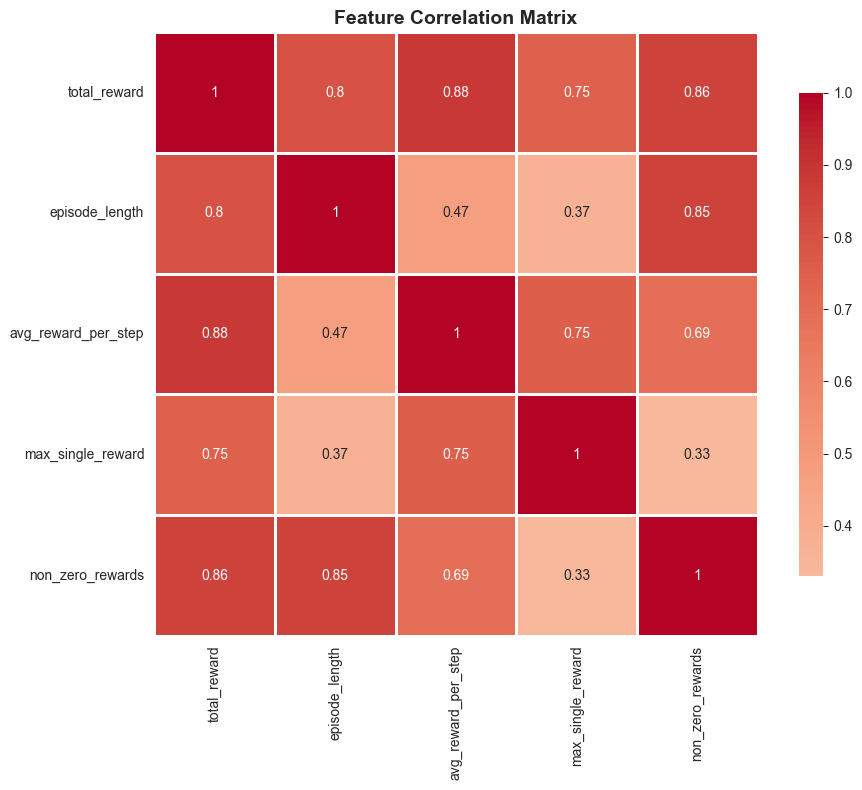


Key Correlations:
Reward vs Length: 0.802
Reward vs Non-Zero Rewards: 0.857
Reward vs Max Single Reward: 0.746


In [7]:
# Correlation matrix
correlation = df[['total_reward', 'episode_length', 'avg_reward_per_step', 
                   'max_single_reward', 'non_zero_rewards']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations:")
print(f"Reward vs Length: {correlation.loc['total_reward', 'episode_length']:.3f}")
print(f"Reward vs Non-Zero Rewards: {correlation.loc['total_reward', 'non_zero_rewards']:.3f}")
print(f"Reward vs Max Single Reward: {correlation.loc['total_reward', 'max_single_reward']:.3f}")

## 6. Detailed Scatter Analysis

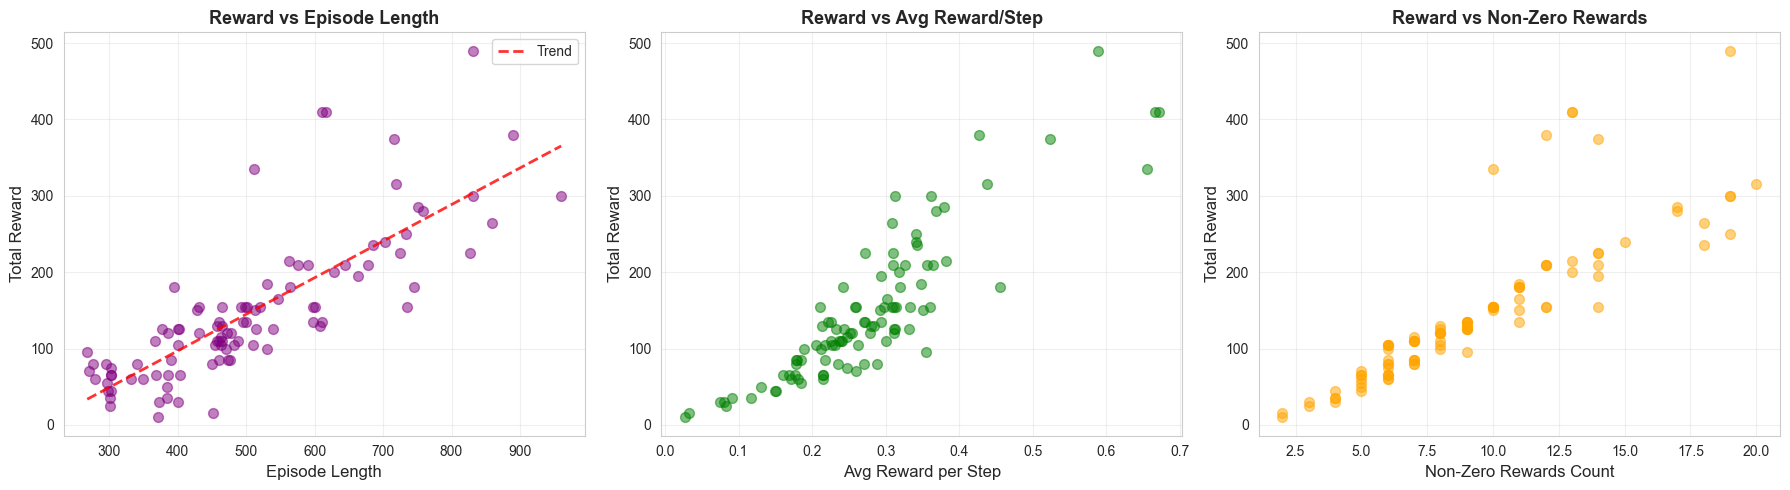

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Reward vs Length
axes[0].scatter(df['episode_length'], df['total_reward'], alpha=0.5, s=50, color='purple')
z = np.polyfit(df['episode_length'], df['total_reward'], 1)
p = np.poly1d(z)
axes[0].plot(sorted(df['episode_length']), p(sorted(df['episode_length'])), 
             "r--", alpha=0.8, linewidth=2, label='Trend')
axes[0].set_xlabel('Episode Length', fontsize=12)
axes[0].set_ylabel('Total Reward', fontsize=12)
axes[0].set_title('Reward vs Episode Length', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Reward vs Avg Reward per Step
axes[1].scatter(df['avg_reward_per_step'], df['total_reward'], alpha=0.5, s=50, color='green')
axes[1].set_xlabel('Avg Reward per Step', fontsize=12)
axes[1].set_ylabel('Total Reward', fontsize=12)
axes[1].set_title('Reward vs Avg Reward/Step', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Reward vs Non-Zero Rewards
axes[2].scatter(df['non_zero_rewards'], df['total_reward'], alpha=0.5, s=50, color='orange')
axes[2].set_xlabel('Non-Zero Rewards Count', fontsize=12)
axes[2].set_ylabel('Total Reward', fontsize=12)
axes[2].set_title('Reward vs Non-Zero Rewards', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Performance Categories

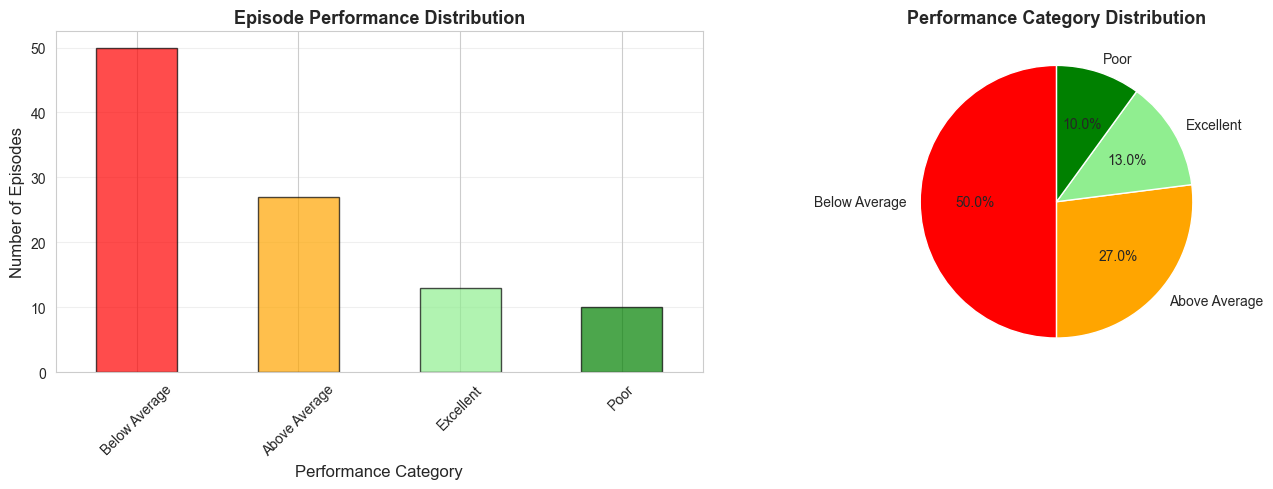


Performance Category Breakdown:
  Below Average: 50 episodes (50.0%)
  Above Average: 27 episodes (27.0%)
  Excellent: 13 episodes (13.0%)
  Poor: 10 episodes (10.0%)


In [9]:
# Categorize episodes
mean = baseline_stats['reward_stats']['mean']
std = baseline_stats['reward_stats']['std']

df['category'] = pd.cut(df['total_reward'], 
                        bins=[-np.inf, mean-std, mean, mean+std, np.inf],
                        labels=['Poor', 'Below Average', 'Above Average', 'Excellent'])

category_counts = df['category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
category_counts.plot(kind='bar', ax=axes[0], color=['red', 'orange', 'lightgreen', 'green'], 
                     alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Performance Category', fontsize=12)
axes[0].set_ylabel('Number of Episodes', fontsize=12)
axes[0].set_title('Episode Performance Distribution', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['red', 'orange', 'lightgreen', 'green'])
axes[1].set_title('Performance Category Distribution', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPerformance Category Breakdown:")
for category, count in category_counts.items():
    print(f"  {category}: {count} episodes ({count/len(df)*100:.1f}%)")

## 8. Key Insights

### Observations:
1. **High Variability**: The coefficient of variation indicates high inconsistency in random agent performance
2. **Correlation**: Episode length and reward show correlation - longer episodes tend to have higher rewards
3. **Distribution**: Reward distribution shows the random nature of gameplay
4. **Baseline Established**: Clear metrics established for comparison with trained agents

### Next Steps:
- Implement preprocessing pipeline (Phase 3)
- These baseline metrics will be our benchmark for improvement
- Any trained agent should significantly outperform this random baseline

## Summary

✅ Phase 2 Complete!

We have:
- Collected 100 episodes of baseline data
- Performed comprehensive statistical analysis
- Created detailed visualizations
- Identified key patterns and correlations
- Established baseline metrics for comparison

**Ready for Phase 3: Preprocessing & Feature Engineering**